<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>


# **이변량 분석 ② - 범주형  → 수치형**


- 시각화와 수치화 방법으로 범주형 변수와 수치형 변수 간 관계를 분석합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/two_var_02.png' width=600 align='left'/>

## **1. 환경준비**

- 사용할 라이브러리와 분석 대상 데이터를 읽어옵니다.

In [1]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Diabetes 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/diabetes2.csv'
diabetes = pd.read_csv(path)
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,BPStatus,SkinThickness,Insulin,BMI,BMIStatus,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,Normal,35.0,NaN,33.6,Obese,0.627,50.0,1
1,1,85.0,66.0,Normal,29.0,NaN,26.6,Overweight,0.351,31.0,0
2,8,183.0,64.0,Normal,NaN,NaN,23.3,Normal,0.672,32.0,1
3,1,89.0,66.0,Normal,23.0,94.0,28.1,Overweight,0.167,21.0,0
4,0,137.0,40.0,Low,35.0,168.0,43.1,Obese,2.288,33.0,1
5,5,116.0,74.0,Normal,NaN,NaN,25.6,Overweight,0.201,30.0,0
6,3,78.0,50.0,Low,32.0,88.0,31.0,Obese,0.248,26.0,1
7,10,115.0,NaN,NaN,NaN,NaN,35.3,Obese,0.134,29.0,0
8,2,197.0,70.0,Normal,45.0,543.0,30.5,Obese,0.158,53.0,1
9,8,125.0,96.0,High,NaN,NaN,NaN,NaN,0.232,54.0,1


In [3]:
# Insurance 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/insurance.csv'
insurance = pd.read_csv(path)
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## **2. 시각화**

- **Seaborn**의 **barplot()** 함수는 범줏값 간의 **평균을 비교**해 표시합니다.
- **Seaborn**의 **boxplot()** 함수로 범줏값 간의 **값 분포를 비교**할 수 있습니다.

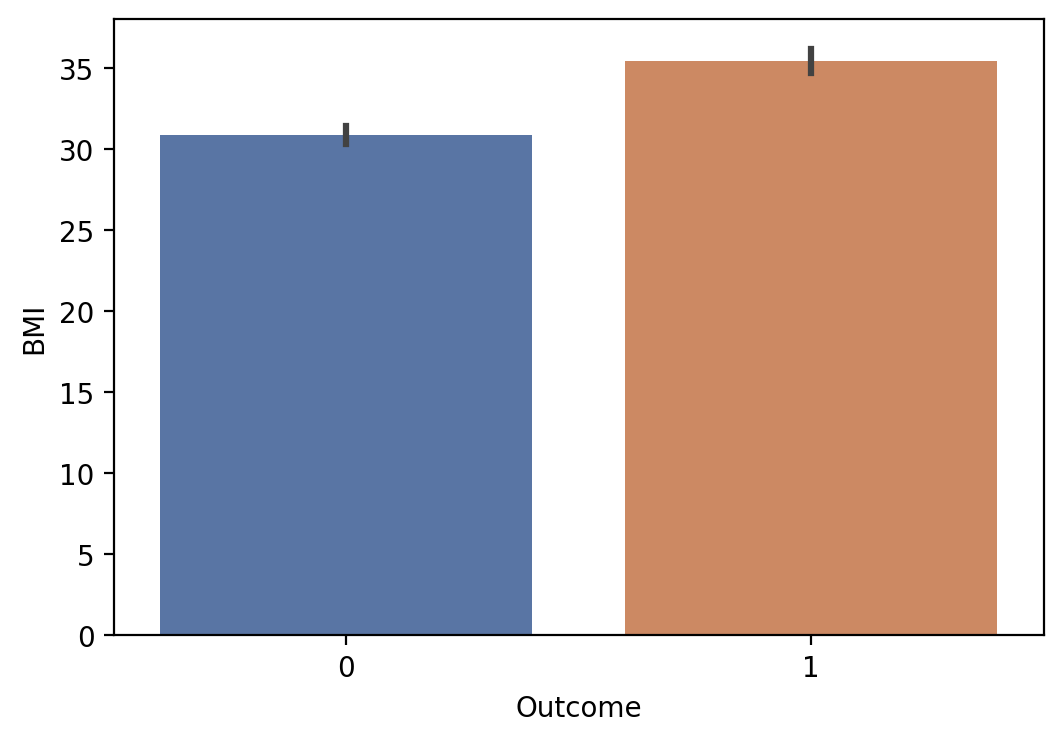

In [4]:
sns.barplot(x='Outcome', y='BMI', data=diabetes, palette='deep') # palette: deep, bright, pastel, dark, muted, colorblind
plt.show()

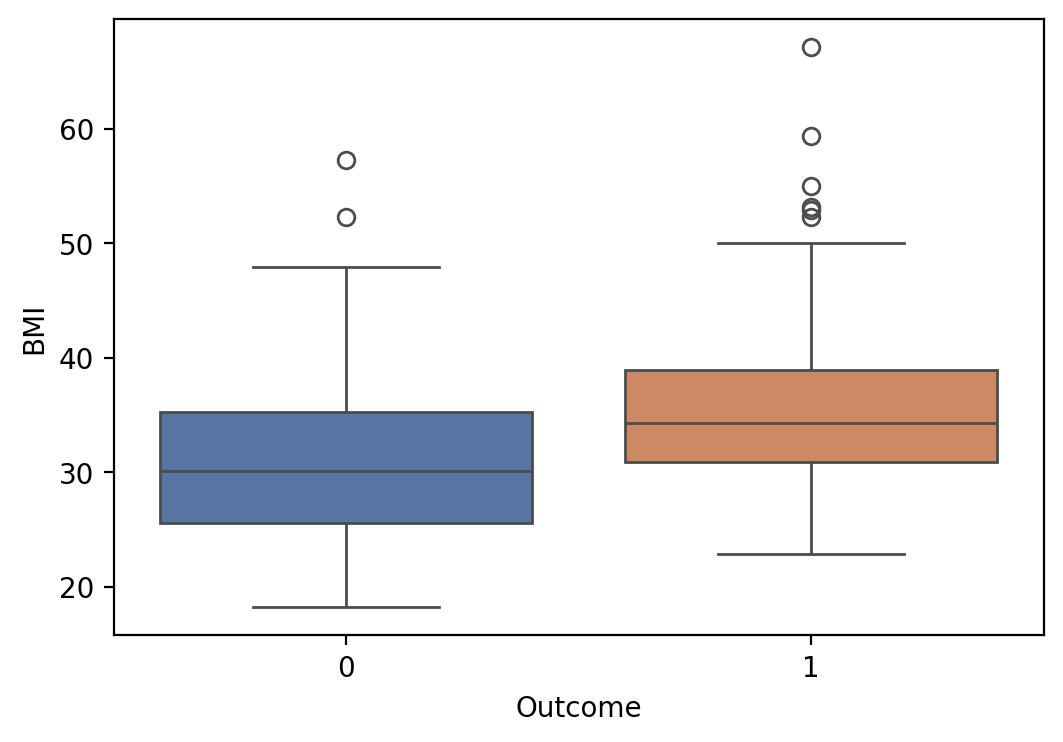

In [5]:
sns.boxplot(x='Outcome', y='BMI', data=diabetes, palette='deep')
plt.show()

- **질문:** 당뇨병여부(Outcome)별 체질량지수(BMI) 평균에 차이가 있나요?

In [6]:
# 차이가 있음

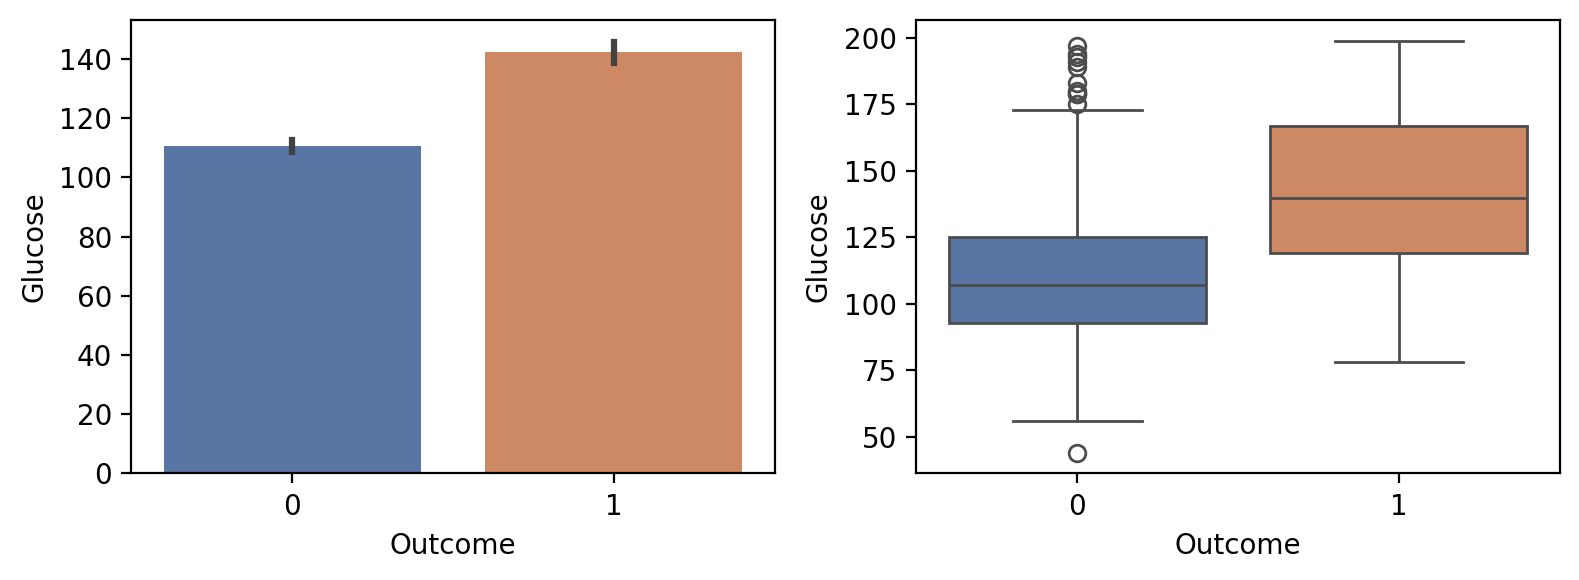

In [7]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='Outcome', y='Glucose', data=diabetes, palette='deep')
plt.subplot(1, 2, 2)
sns.boxplot(x='Outcome', y='Glucose', data=diabetes, palette='deep')
plt.tight_layout()
plt.show()

- **질문:**  당뇨병여부(Outcome)별 혈당수치(Glucose) 평균에 차이가 있나요?

In [ ]:
# 차이가 있음

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

insurance 데이터프레임의 다음 변수들 간의 관계를 barplot(), boxplot() 함수로 확인하세요.

**1️⃣ sex → charges**

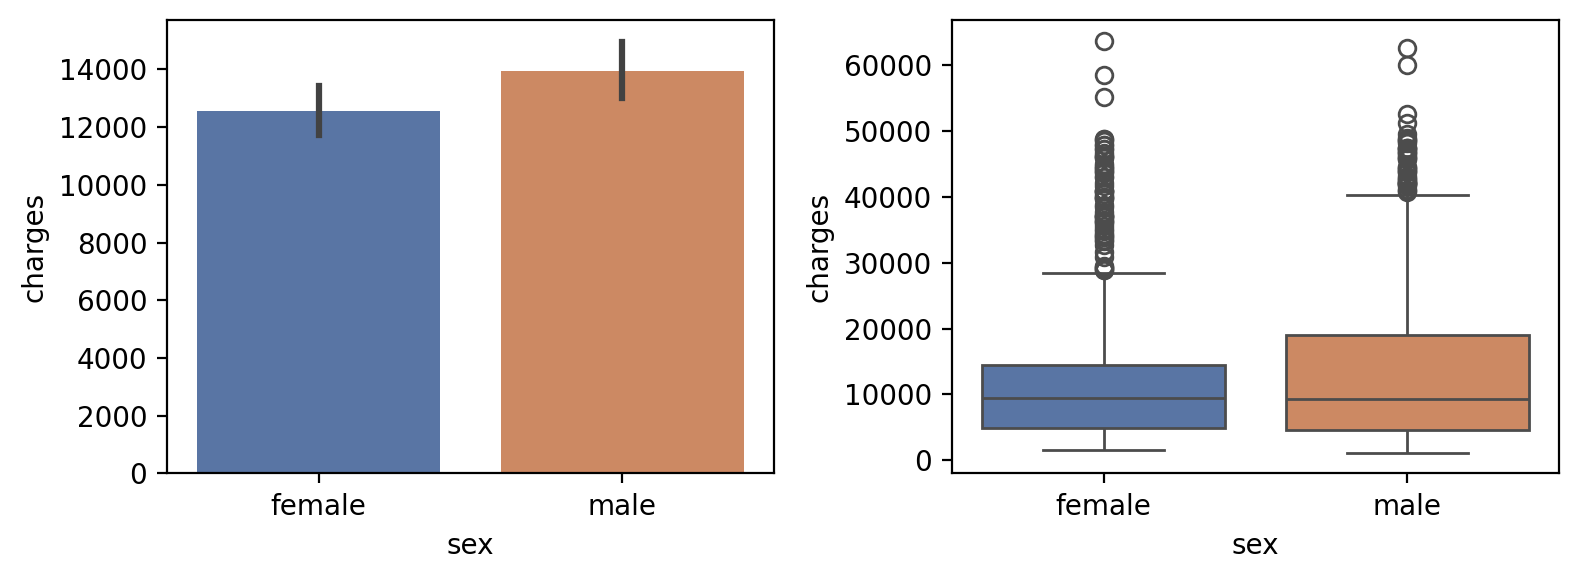

In [9]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
sns.barplot(x='sex', y='charges', data=insurance, palette='deep')
plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='charges', data=insurance, palette='deep')
plt.tight_layout()
plt.show()

- **질문:**  남녀(sex)별 의료비(charges) 평균에 차이가 있나요?

In [ ]:
# 유의미한 차이가 있다고 보기에는 근거가 부족하다

**2️⃣ smoker → charges**

- **질문:**  흡연 여부(smoker)별 의료비(charges) 평균에 차이가 있나요?

In [ ]:
#

**3️⃣ region → charges**

- **질문:**  지역(region)별 의료비(charges) 평균에 차이가 있나요?

In [ ]:
#

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

## **3. 수치화**

- 이제는 시각화 대신 수치화를 통해 비교해 봅니다.
- 다음 두 가지 방법으로 수치화해 확인합니다.
    - t-검정(두 범주)
    - ANOVA(세 범주 이상)

### **3.1. t-검정**

- 두 집단의 평균값이 서로 유의하게 다른지를 검정하는 통계적인 방법입니다.
- 데이터에 결측치가 있으면 계산이 안되니, notnull() 등으로 결측치를 제외한 데이터를 사용해야 합니다.
- **scipy.stats** 라이브러리의 **ttest_ind()** 함수로 t-검정을 수행합니다



**📌 t-statistics, t-통계량, t-value**
- 두 평균의 차이를 표준오차로 나눈 값입니다.
- 기본적으로는 두 평균의 차이로 이해해도 좋습니다.
- 우리의 가설(대립가설)은 차이가 있다는 것이므로, t-통계량 값이 크던지 작던지 하기를 바랍니다.
- 보통, **t-통계량 값이 -2보다 작거나, 2보다 크면 차이가 있다고 봅니다.**

**📌 p-value**

- t-검정에서 p-value는 유의확률(Significance Probability)로도 불립니다.
- 귀무가설(Null Hypothesis)을 검정할 때 사용되는 값입니다.
- p-value는 귀무가설이 맞을 때 표본에서 계산된 통계량이 나올 확률을 나타냅니다.
- 따라서, p-value가 작을수록 귀무가설이 틀릴 확률이 높아지므로, 귀무가설을 기각하게 됩니다.
- **p-value 값이 작으면 통계적으로 유의미한 차이가 있다는 것을 의미한다고 보면 됩니다**

**📌 표준오차**

- 모집단의 평균을 구하고 싶지만, 모집단이 너무 커서 구할 수 없습니다.
- 그래서 모집단에서 표본(Sample)을 뽑아 그 표본의 평균을 구합니다.
- 계속해서 표본을 뽑아 그 표본의 평균을 구합니다.
- 이 표본들의 평균의 평균이 모집단의 평균입니다.
- 그리고 이 표본들의 평균의 표준편차를 **표준오차**라고 부릅니다.
- 즉 추정값인 표본 평균들과 참값인 모평균과의 표준적인 차이라고 할 수 있습니다.

- 우선 두 개의 모집단을 만듭니다.
    - pop1: 평균이 160, 표준편차가 10인 100,000개의 실수
    - pop2: 평균이 170, 표준편차가 10인 100,000개의 실수
    

In [10]:
pop1 = [round(rd.normalvariate(160, 10), 1) for i in range(100000)]
pop2 = [round(rd.normalvariate(170, 10), 1) for i in range(100000)]

# 확인
print('* pop1:', pop1[:10])
print('* pop2:', pop2[:10])

* pop1: [158.1, 155.8, 169.8, 161.1, 162.1, 165.2, 169.2, 157.4, 149.5, 158.7]
* pop2: [162.1, 187.5, 159.7, 171.5, 167.8, 169.6, 168.5, 180.6, 166.0, 173.7]


- 우리는 모집단을 알 수 없지만 그래도 살짝 살펴봅니다.

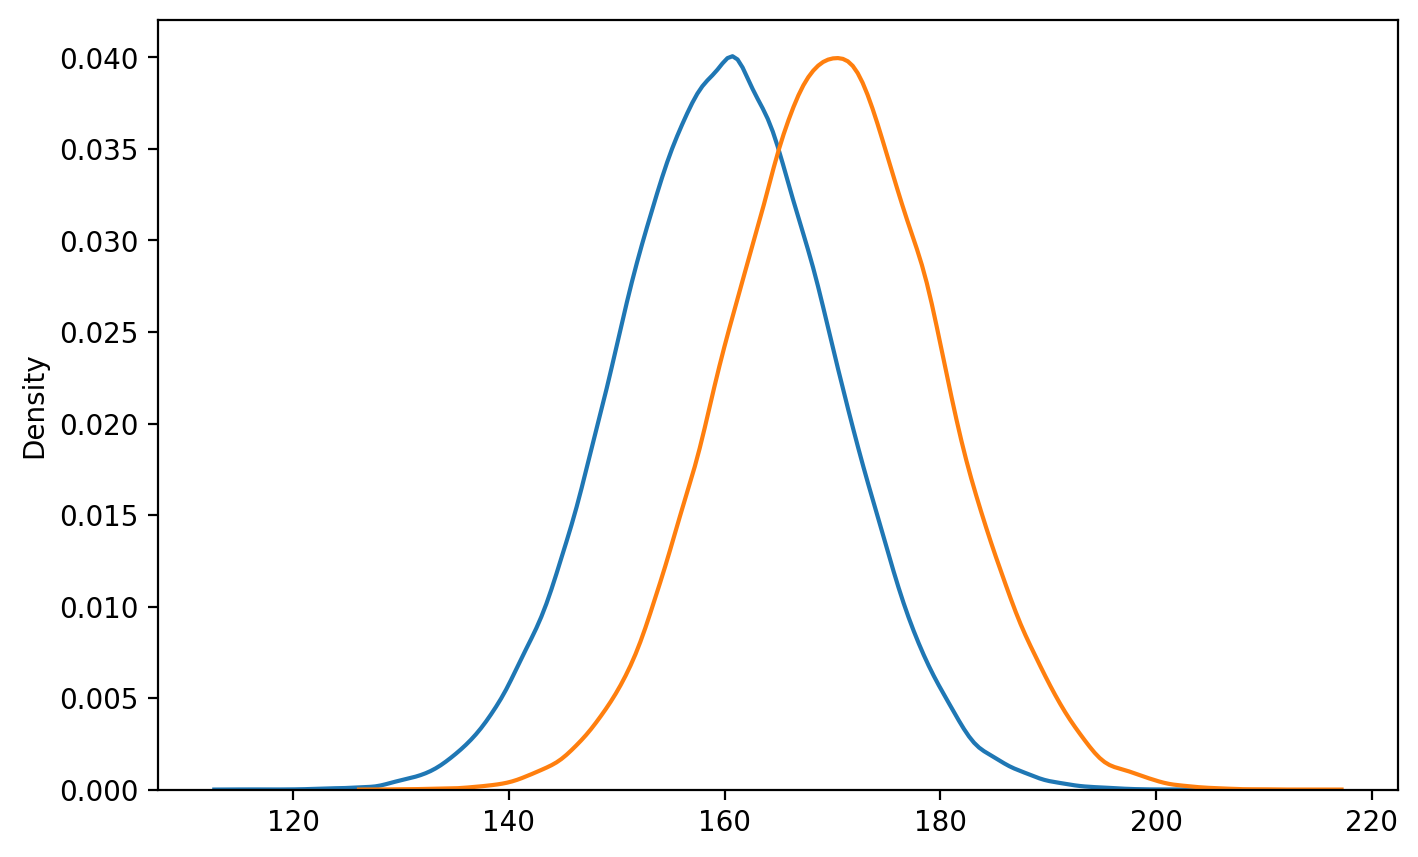

In [11]:
plt.figure(figsize=(8, 5))
sns.kdeplot(pop1)
sns.kdeplot(pop2)
plt.show()

- 이제 두 모집단으로 부터 표본을 200개씩 추출한 후 t-검정을 수행합니다.
- 먼저 모집단 pop1으로 부터 두 개의 샘플을 추출한 후 t-검정을  수행합니다.

In [12]:
s1 = rd.sample(pop1, 200)
s2 = rd.sample(pop1, 200)
t_test = spst.ttest_ind(s1, s2)

print('* t-statistic:', t_test[0])
print('* p-value:', t_test[1])

* t-statistic: 0.12580357405908638
* p-value: 0.8999509360766702


- **질문:**  p-value의 의미는?

In [ ]:
# p-value가 0.05보다 크므로 유의미한 차이가 없다고 봄

- 이번에는 서로 다른 모집단으로 부터 각각 샘플링한 후 t-검정을 수행합니다.

In [13]:
s1 = rd.sample(pop1, 200)
s2 = rd.sample(pop2, 200)
t_test = spst.ttest_ind(s1, s2)

print('* t-statistic:', t_test[0])
print('* p-value:', t_test[1])

* t-statistic: -10.729066155315587
* p-value: 9.267402854020423e-24


In [ ]:
# p-value가 매우 작으므로 차이가 있다고 봄

- 이번엔 Diabetes 데이터프레임으로 시도해 봅니다.
- **Outcome → BMI**: 당뇨병여부별로 체질량지수에 차이가 있을것이다.
- 먼저 결측치가 있는지 확인해 봅니다.

In [14]:
diabetes.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
BPStatus                     35
SkinThickness               227
Insulin                     374
BMI                          11
BMIStatus                    11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

- BMI 변수에 결측치가 없는 행만 가져와 다음 두 변수를 선언합니다.
    - temp01: 당뇨병환자 체질량지수
    - temp02: 정상환자 체질량지수
- 이 두 변수가 가지는 BMI에 차이가 있을지 궁금합니다.

In [15]:
temp = diabetes.loc[diabetes['BMI'].notnull()]
temp01 = temp.loc[temp['Outcome']==0, 'BMI']
temp02 = temp.loc[temp['Outcome']==1, 'BMI']

t_test = spst.ttest_ind(temp01, temp02)

print('* t-statistic:', t_test[0])
print('* p-value:', t_test[1])

* t-statistic: -9.07722131205247
* p-value: 9.545638087577825e-19


- **질문:**   p-value의 의미는?

In [16]:
# p-value가 0.05보다 작으므로 유의미한 차이가 있다고 봄
# 즉 당뇨병여부별로 나이가 차이가 있다고 봄

- **Outcome → BloodPressure**: 당뇨병환자여부에 따라 혈압에 차이가 있을 것이다.

In [17]:
temp = diabetes.loc[diabetes['BloodPressure'].notnull()]
temp01 = temp.loc[temp['Outcome']==1, 'BloodPressure']
temp02 = temp.loc[temp['Outcome']==0, 'BloodPressure']

t_test = spst.ttest_ind(temp01, temp02)

print('* t-statistic:', t_test[0])
print('* p-value:', t_test[1])

* t-statistic: 4.680835112808535
* p-value: 3.405150901552251e-06


- **질문:**   p-value의 의미는?

In [ ]:
# p-value가 0.05보다 작으므로 유의미한 차이가 있다고 봄
# 즉 당뇨병여부별로 혈압에 차이가 있다고 봄

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

insurance 데이터프레임의 다음 변수들 간의 관계를 t-통계량과 p-value를 사용해 확인하세요.

**1️⃣ sex → charges**

In [19]:

temp = insurance.loc[insurance['charges'].notnull()]
male = temp.loc[temp['sex']=='male', 'charges']
female = temp.loc[temp['sex']=='female', 'charges']

t_test = spst.ttest_ind(male, female)

print('* t-statistic:', t_test[0])
print('* p-value:', t_test[1])

* t-statistic: 2.097546590051688
* p-value: 0.03613272100592976


- **질문:**  남녀(sex)별 의료비(charges) 평균에 차이가 있나요?

In [ ]:
#

**2️⃣ smoker → charges**

- **질문:**  흡연 여부(smoker)별 의료비(charges) 평균에 차이가 있나요?

In [ ]:
#

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

### **3.2. 분산분석**

- 세 개 이상의 집단 간 차이는 분산분석(ANOVA)으로 비교합니다.
- ANOVA: **AN**alysis **O**f **VA**riance
- 여기서 기준은 전체 평균 입니다.
- **scipy.stats** 라이브러리의 **f_oneway()** 함수로 분산분석을 수행합니다.

**📌 f-statistics, f-통계량, f-value**

- 두 개 이상의 집단 간 분산의 비율을 검정하는 데 사용되는 통계량입니다.
- 분산분석(ANOVA)에서 사용되며, 각 집단 내에서의 분산과 각 집단 간의 분산의 비율을 계산합니다.
- $f-통계량=\frac{집단간 분산}{집단내 분산}  $
- 이 계산 결과로 각 집단이 모집단으로부터 동일한 분산을 가지는지를 검정합니다.
- 분산의 비율이 작을수록 1에 가까운 값을 가집니다.
- 분산의 비율이 클수록 f-통계량 값이 커집니다.
- f-통계량 값이 크다는 것은 각 집단 간 차이가 통계적으로 유의미하다는 것을 나타냅니다.
- 보통, **f-통계량 값이 2~3 이상이면 차이가 있다고 봅니다.**

- **BPStatus → Age**: 혈압수준별로 나이에 차이가 있을 것이다.

* 전체평균: 33.240885416666664


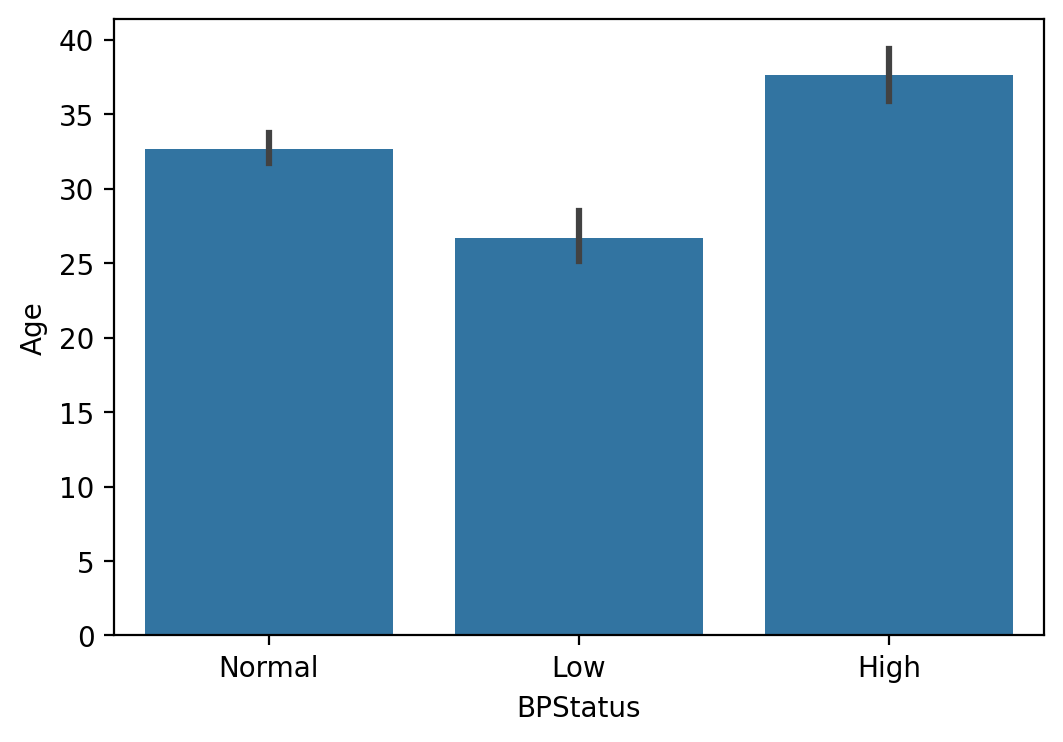

In [20]:
print('* 전체평균: {}'.format(diabetes['Age'].mean()))

sns.barplot(x='BPStatus', y='Age', data=diabetes)
plt.show()

- BPStatus 값을 기준으로 low, normal, high 세 집단을 만듭니다.
- 결측치가 없는 데이터만을 대상으로 합니다.

In [21]:
temp = diabetes.loc[(diabetes['BPStatus'].notnull()) & (diabetes['Age'].notnull())]
low = temp.loc[temp['BPStatus']=='Low', 'Age']
normal = temp.loc[temp['BPStatus']=='Normal', 'Age']
high = temp.loc[temp['BPStatus']=='High', 'Age']

anova = spst.f_oneway(low, normal, high)
print('* f-statistic:', anova[0])
print('* p-value:', anova[1])

* f-statistic: 29.665873632653053
* p-value: 4.102991806852963e-13


- **BMIStatus → Glucose**: BMI수준별로 혈당수치에 차이가 있을 것이다.

* 전체평균: 121.6867627785059


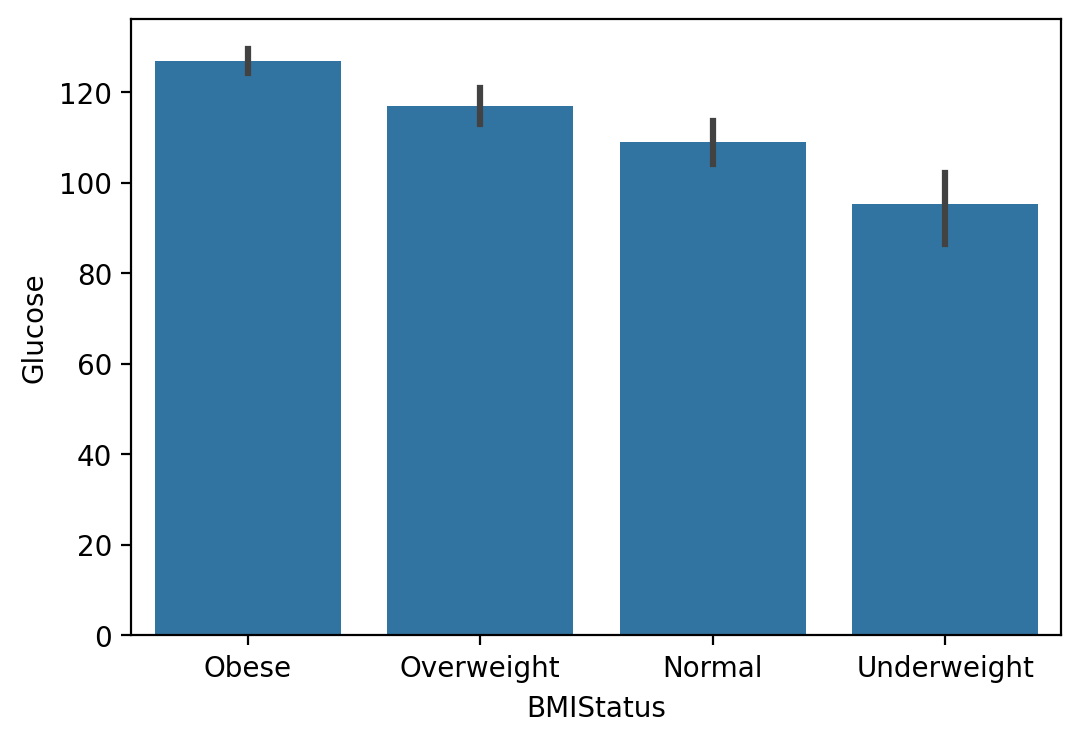

In [22]:
print('* 전체평균: {}'.format(diabetes['Glucose'].mean()))

sns.barplot(x='BMIStatus', y='Glucose', data=diabetes)
plt.show()

In [23]:
temp = diabetes.loc[(diabetes['BMIStatus'].notnull()) & (diabetes['Glucose'].notnull())]
under = temp.loc[temp['BMIStatus']=='Underweight', 'Glucose']
normal = temp.loc[temp['BMIStatus']=='Normal', 'Glucose']
over = temp.loc[temp['BMIStatus']=='Overweight', 'Glucose']
obese = temp.loc[temp['BMIStatus']=='Obese', 'Glucose']

anova = spst.f_oneway(under, normal, high, obese)
print('* f-statistic:', anova[0])
print('* p-value:', anova[1])

* f-statistic: 517.2420794381629
* p-value: 1.7780153142013586e-184


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

insurance 데이터프레임의 다음 변수 간의 관계를 f-통계량과 p-value를 사용해 확인하세요.

**1️⃣ region → charges**

In [24]:
s_est = insurance.loc[insurance['region']=='southeast', 'charges']
s_west = insurance.loc[insurance['region']=='southwest', 'charges']
n_east = insurance.loc[insurance['region']=='northeast', 'charges']
n_west = insurance.loc[insurance['region']=='northwest', 'charges']

anova = spst.f_oneway(under, normal, high, obese)
print('* f-statistic:', anova[0])
print('* p-value:', anova[1])

* f-statistic: 517.2420794381629
* p-value: 1.7780153142013586e-184


- **질문:**  지역(region)별 의료비(charges) 평균에 차이가 있나요?

In [ ]:
#

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>